In [36]:
import time
import numpy as np
import matplotlib.pyplot as plt

import cantera as ct
print('Running Cantera version: ' + ct.__version__)

from inputs import *

Running Cantera version: 3.1.0


### Define $T_{ign}$ evaluation function

Define the ignition delay time (IDT). This function computes the ignition
delay from the occurrence of the peak concentration for the specified species.

In [37]:
def ignition_delay(states, species:str):
    i_ign = states(species).Y.argmax()
    return states.t[i_ign]

## IDT calculation



In [38]:
gas = ct.Solution('aramco3.yaml')
gas.TP = T_30, P_30
# NOTE We evaluate T_ign at phi=1 for worst case.
gas.set_equivalence_ratio(phi=1.0, fuel={'CH4':1.0},
                               oxidizer={'O2': 1.0, 'N2': 3.76})


r = ct.Reactor(contents=gas)
reactor_network = ct.ReactorNet([r])
time_history_RG = ct.SolutionArray(gas, extra=['t'])

t_ign_est = 5.0

t = 0
t0 = time.time()
counter = 1
while t < t_ign_est:
    t = reactor_network.step()
    if counter % 10 == 0:
        time_history_RG.append(r.thermo.state, t=t)
    counter += 1

tau_ign = ignition_delay(time_history_RG, 'OH')

t1 = time.time()
print("Computed Ignition Delay: {:.3e} seconds. "
      "Took {:3.2f} s to compute".format(tau_ign, t1-t0))

Computed Ignition Delay: 2.895e+00 seconds. Took 6.39 s to compute


## Plot the results



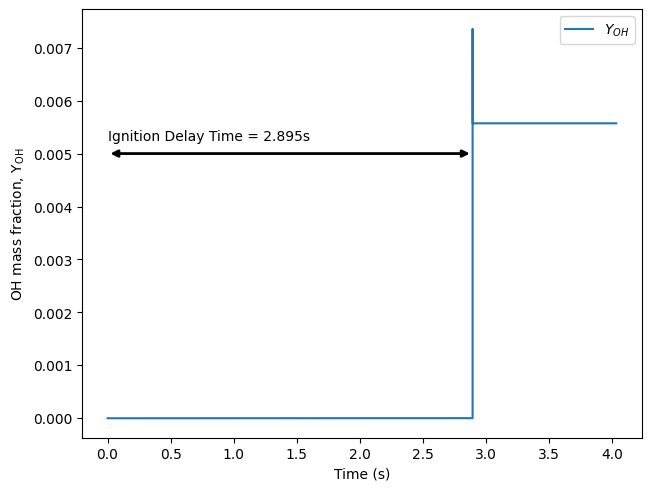

In [39]:
plt.rcParams['figure.constrained_layout.use'] = True

plt.figure()
plt.plot(time_history_RG.t, time_history_RG('oh').Y)
plt.xlabel('Time (s)')
plt.ylabel(r'OH mass fraction, $\mathdefault{Y_{OH}}$')

ax = plt.gca()
ax.annotate("", xy=(tau_ign, 0.005), xytext=(0, 0.005),
           arrowprops=dict(arrowstyle="<|-|>", color='k', linewidth=2.0))
plt.annotate(f'Ignition Delay Time = {tau_ign:.3f}s', xy=(0, 0), xytext=(0.00008, 0.00525))

plt.legend([r"$Y_{OH}$"])